In [1]:
import os, sklearn, openpyxl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk

data_dir = os.path.join(os.getcwd(), "Dataset")

d:\SMU Stuff\Year 3 (2022)\Term 3.2\IS450 (G1) - Text Mining & Lang Processing\Project\Dataset


In [9]:
music_df = pd.read_csv(os.path.join(data_dir, "tcc_ceds_music.csv"), index_col=0)

In [12]:
music_df.head()

,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,night/time,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,0.001284,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,0.001350,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


In [14]:
music_df.shape

(28372, 30)

In [15]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28372 entries, 0 to 82451
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   artist_name               28372 non-null  object 
 1   track_name                28372 non-null  object 
 2   release_date              28372 non-null  int64  
 3   genre                     28372 non-null  object 
 4   lyrics                    28372 non-null  object 
 5   len                       28372 non-null  int64  
 6   dating                    28372 non-null  float64
 7   violence                  28372 non-null  float64
 8   world/life                28372 non-null  float64
 9   night/time                28372 non-null  float64
 10  shake the audience        28372 non-null  float64
 11  family/gospel             28372 non-null  float64
 12  romantic                  28372 non-null  float64
 13  communication             28372 non-null  float64
 14  obscen

In [16]:
music_df.isnull().sum()

artist_name                 0
track_name                  0
release_date                0
genre                       0
lyrics                      0
len                         0
dating                      0
violence                    0
world/life                  0
night/time                  0
shake the audience          0
family/gospel               0
romantic                    0
communication               0
obscene                     0
music                       0
movement/places             0
light/visual perceptions    0
family/spiritual            0
like/girls                  0
sadness                     0
feelings                    0
danceability                0
loudness                    0
acousticness                0
instrumentalness            0
valence                     0
energy                      0
topic                       0
age                         0
dtype: int64

In [17]:
music_df.sample(5)

,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,night/time,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
52464,dead meadow,six to let the light shine thru,2013,blues,rotten thoughts burn head cold light shin pale...,37,0.002024,0.408743,0.002024,0.002024,...,0.054073,0.002024,0.205025,0.725329,0.000815,0.423077,0.510511,0.689680,violence,0.100000
74486,foreigner,that was yesterday,1984,rock,think know time tell away haunt night friend c...,65,0.000849,0.000849,0.569369,0.000849,...,0.208146,0.043770,0.399978,0.724047,0.047891,0.000008,0.497115,0.683674,world/life,0.514286
42433,wicked lady,life and death,1968,blues,fight long long lose see time better days yeah...,64,0.001012,0.306557,0.307535,0.113087,...,0.001012,0.001012,0.646919,0.551111,0.219879,0.134615,0.328112,0.393374,world/life,0.742857
11759,tears for fears,goodnight song,1993,pop,stage time come strain time alive swan song pl...,64,0.000993,0.204493,0.000993,0.186839,...,0.067174,0.000993,0.567854,0.744276,0.015662,0.000675,0.660965,0.834830,music,0.385714
42411,steppenwolf,spiritual fantasy,1968,blues,humanity grow weary doubtful state mind summon...,52,0.001462,0.001462,0.392643,0.086059,...,0.066564,0.001462,0.435720,0.494065,0.840361,0.000000,0.286892,0.149123,world/life,0.742857


In [18]:
primary_df = music_df[["artist_name", "track_name", "genre", "lyrics", "topic"]]

In [19]:
primary_df.head()

,artist_name,track_name,genre,lyrics,topic
0,mukesh,mohabbat bhi jhoothi,pop,hold time feel break feel untrue convince spea...,sadness
4,frankie laine,i believe,pop,believe drop rain fall grow believe darkest ni...,world/life
6,johnnie ray,cry,pop,sweetheart send letter goodbye secret feel bet...,music
10,pérez prado,patricia,pop,kiss lips want stroll charm mambo chacha merin...,romantic
12,giorgos papadopoulos,apopse eida oneiro,pop,till darling till matter know till dream live ...,romantic


(array([7042.,    0.,    0., 5445.,    0.,    0., 4604.,    0.,    0.,
           0., 3845.,    0.,    0., 2498.,    0.,    0., 4034.,    0.,
           0.,  904.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. , 3.3, 3.6,
        3.9, 4.2, 4.5, 4.8, 5.1, 5.4, 5.7, 6. ]),
 <BarContainer object of 20 artists>)

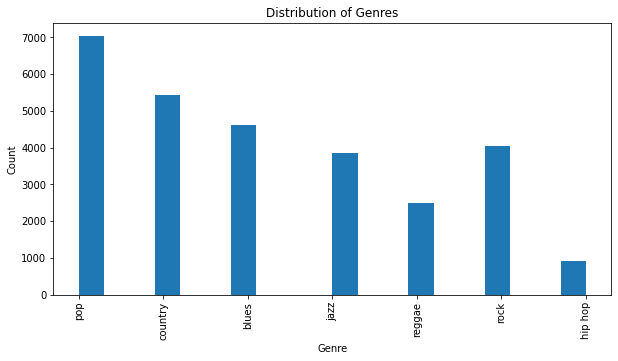

In [20]:
#plotting the distribution of the genres
plt.figure(figsize=(10,5))
plt.title("Distribution of Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.hist(primary_df["genre"], bins=20)

(array([6096.,    0., 5420.,    0.,    0., 2303.,    0.,    0., 1524.,
           0.,    0., 5710.,    0.,    0., 4882.,    0.,    0., 1825.,
           0.,  612.]),
 array([0.  , 0.35, 0.7 , 1.05, 1.4 , 1.75, 2.1 , 2.45, 2.8 , 3.15, 3.5 ,
        3.85, 4.2 , 4.55, 4.9 , 5.25, 5.6 , 5.95, 6.3 , 6.65, 7.  ]),
 <BarContainer object of 20 artists>)

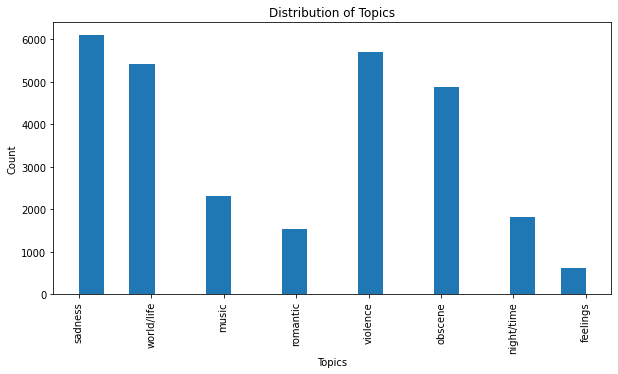

In [22]:
#plotting the distribution of the topics
plt.figure(figsize=(10,5))
plt.title("Distribution of Topics")
plt.xlabel("Topics")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.hist(primary_df["topic"], bins=20)

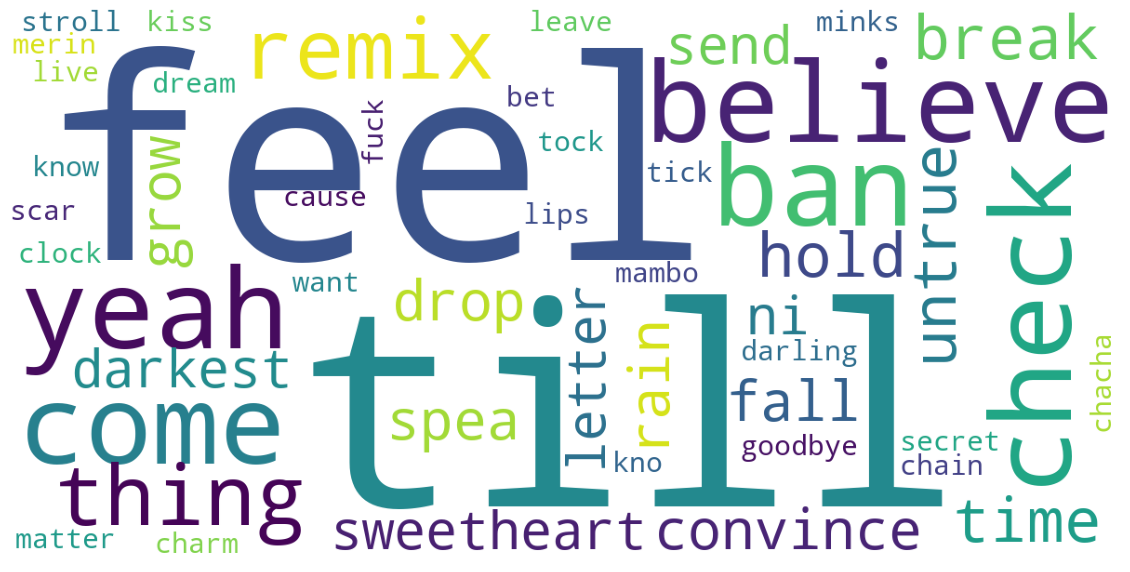

In [26]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=100, 
        scale=3,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(primary_df["lyrics"])